<a href="https://colab.research.google.com/github/DhruviPatel04/AQI/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import All Important Libraries

In [ ]:
import numpy as np
import  seaborn as sns
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.utils import to_categorical

To import the dataset from Google Drive we need to connect Google Drive to Google Colab notebook

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now Google drive is connected to the google colab so Now just open the file and folder in it and copy the path of particular .csv file

In [ ]:
df = pd.read_csv('/content/city_day.csv')
_df_5=pd.DataFrame(df)
_df_15=pd.DataFrame(df)

Now Accessing the First five line of the data how the data looks like

In [ ]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

this code generates a plot showing PM2.5 pollutant levels over time, categorized by different AQI buckets, with a legend indicating the buckets and appropriate visual styling.

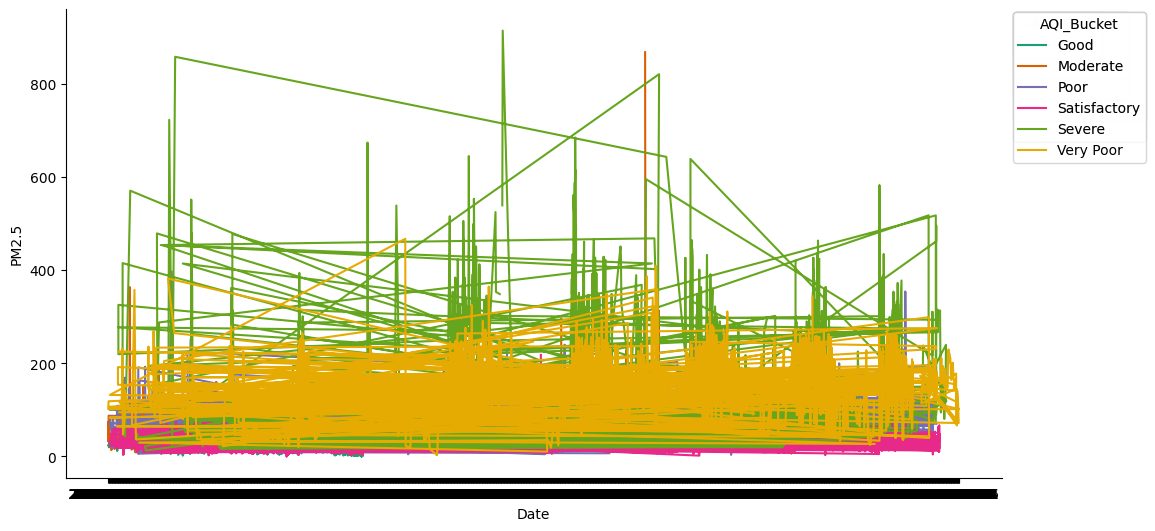

In [ ]:
# @title Date vs PM2.5
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['PM2.5']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AQI_Bucket')):
  _plot_series(series, series_name, i)
  fig.legend(title='AQI_Bucket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('PM2.5')

 this code generates a horizontal bar chart showing the distribution of data points across different AQI buckets, with a specific color scheme and aesthetic adjustments to enhance readability.

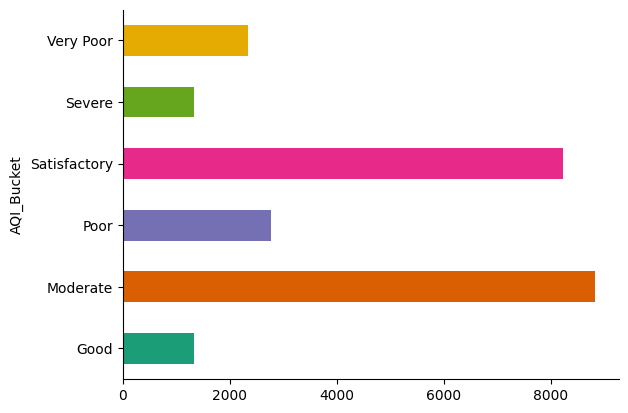

In [ ]:
# @title AQI_Bucket

df.groupby('AQI_Bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

For representing the number of rows and columns in the DataFrame.

In [ ]:
df.shape

(29531, 16)

To identify missing or NaN (Not a Number) values in a DataFrame df. It returns a DataFrame of the same shape as df where each element is True if the corresponding element in df is NaN, and False otherwise

In [ ]:
df.isnull()

City   Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      False  False   True   True  False  False  False   True  False  False   
1      False  False   True   True  False  False  False   True  False  False   
2      False  False   True   True  False  False  False   True  False  False   
3      False  False   True   True  False  False  False   True  False  False   
4      False  False   True   True  False  False  False   True  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  False  False  False  False  False  False  False  False  False  False   
29527  False  False  False  False  False  False  False  False  False  False   
29528  False  False  False  False  False  False  False  False  False  False   
29529  False  False  False  False  False  False  False  False  False  False   
29530  False  False  False  False  False  False  False  False  False  False   

          O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0      False    False    False   False   True        True  
1      False    False    False   False   True        True  
2      False    False    False   False   True        True  
3      False    False    False   False   True        True  
4      False    False    False   False   True        True  
...      ...      ...      ...     ...    ...         ...  
29526  False    False    False   False  False       False  
29527  False    False    False   False  False       False  
29528  False    False    False   False  False       False  
29529  False    False    False   False  False       False  
29530  False     True     True    True  False       False  

[29531 rows x 16 columns]

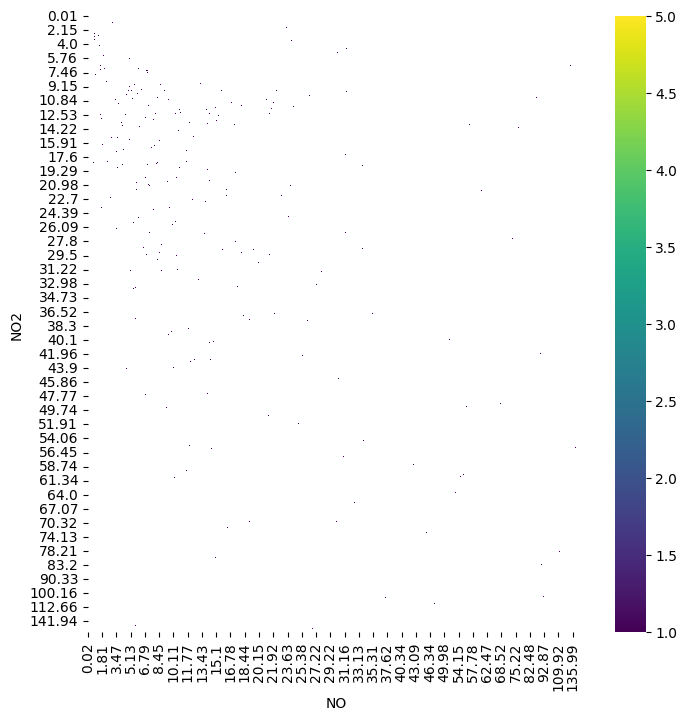

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NO2'].value_counts()
    for x_label, grp in df.groupby('NO')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NO')
_ = plt.ylabel('NO2')


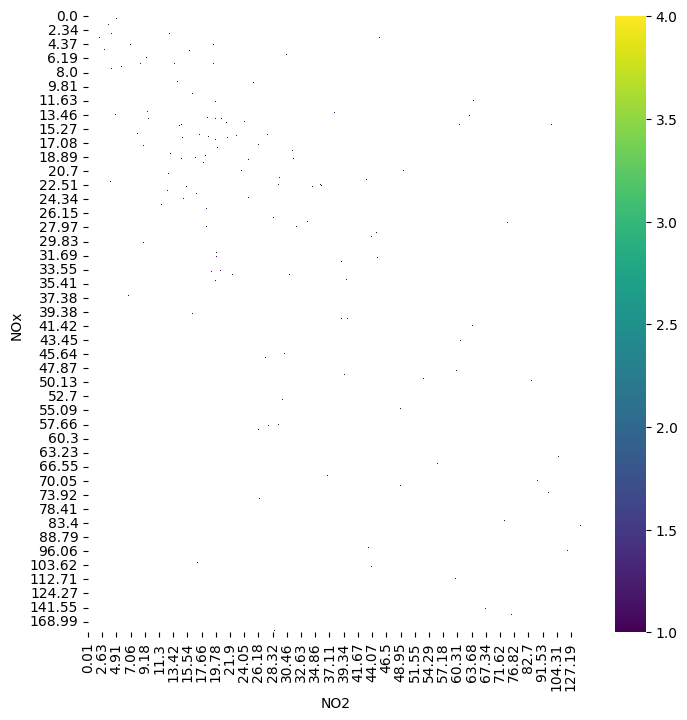

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NOx'].value_counts()
    for x_label, grp in df.groupby('NO2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NO2')
_ = plt.ylabel('NOx')

This is the heatmap for how many data or values are missing in the dataset

<Axes: >

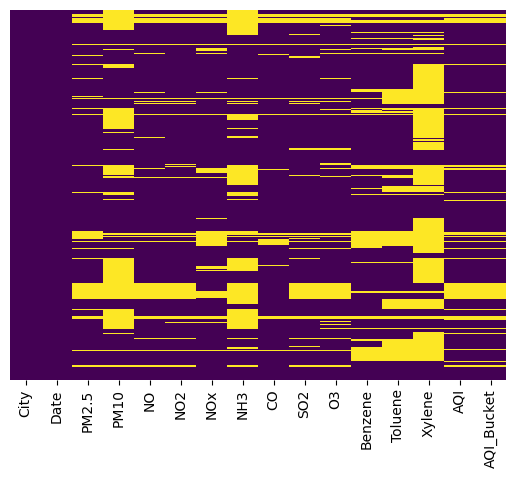

In [ ]:
aqi_buckets = len(df.AQI_Bucket.unique())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

To count the number of missing or NaN (Not a Number) values in each column of a DataFrame df

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Data Exploration and Pre-processing(Cleaning the Data)

In [ ]:
# Assuming you have loaded your data into a DataFrame named 'city_day'
city_day = pd.read_csv('/content/city_day.csv')

# Now you can use the 'dropna()' function on the 'city_day' DataFrame
cleaned_data = city_day.dropna()

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [ ]:
no_of_cities = len(cleaned_data.City.unique())
no_of_cities

9

overall, this code snippet retrieves the unique values present in the "AQI_Bucket" column of the DataFrame cleaned_data and then calculates the number of unique values, storing it in the variable aqi_buckets

In [ ]:
aqi_buckets = len(cleaned_data.AQI_Bucket.unique())
cleaned_data.AQI_Bucket.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

This line filters the DataFrame cleaned_data to only include rows where the 'AQI_Bucket' column has the value 'Moderate'. It then selects the 'AQI' column from these filtered rows and assigns it to the variable moderate. Similarly, the next lines filter the DataFrame for other categories such as 'Poor', 'Very Poor', 'Satisfactory', 'Good', and 'Severe', and assign the filtered 'AQI' values to variables named poor, very_poor, satisfactory, good, and severe, respectively.

After executing these lines, you'll have separate sets of AQI values for each category of AQI_Bucket, stored in different variables, which could be useful for further analysis or visualization

In [ ]:
moderate = cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Moderate']
poor     = cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Poor']
very_poor= cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Very Poor']
satisfactory     = cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Satisfactory']
good = cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Good']
severe     = cleaned_data.AQI[cleaned_data.AQI_Bucket == 'Severe']

These calculations provide insights into the range of AQI values associated with moderate air quality, helping to understand the variability within this category.

In [ ]:
moderate.min() , moderate.max()

(101.0, 200.0)

These lines calculate the minimum and maximum values within the good variable, which likely contains AQI (Air Quality Index) values corresponding to the 'Good' category in the 'AQI_Bucket' column

In [ ]:
good.min() , good.max()

(23.0, 50.0)

To plot all these categories on one graph, I use a histogram to visualize the distribution of AQI values for each category.

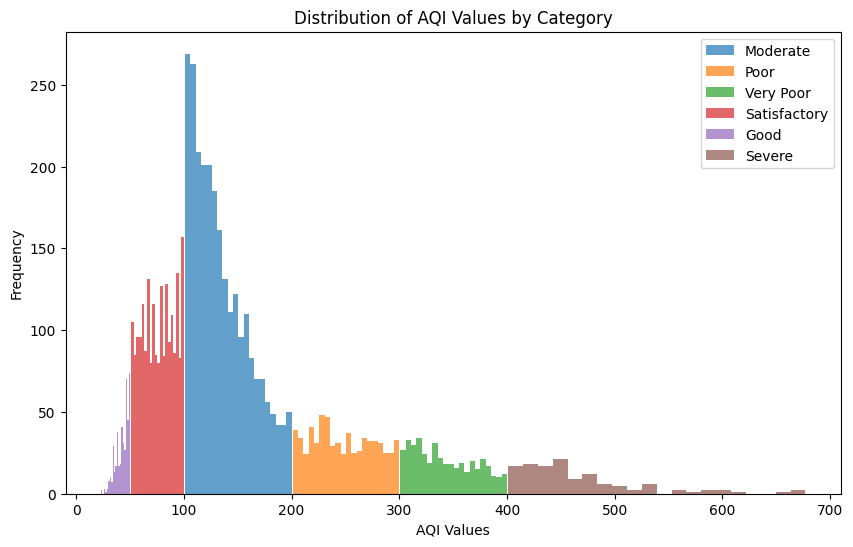

In [ ]:
# Define the categories and corresponding data
categories = ['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe']
data = [moderate, poor, very_poor, satisfactory, good, severe]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each category as a histogram
for category, values in zip(categories, data):
    ax.hist(values, bins=20, alpha=0.7, label=category)

# Set labels and title
ax.set_xlabel('AQI Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of AQI Values by Category')
ax.legend()

# Show the plot
plt.show()


For the future selection[Drop unwanted data from dataset]

In [ ]:
# Drop the 'Date' column from df
df = df.drop('Date', axis=1)

# Display the remaining columns
print(df.columns)

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


 this code creates a scatter plot using Plotly Express, with cities on the x-axis and their corresponding Air Quality Index (AQI) values on the y-axis, and then it displays the plot.







In [ ]:
fig = px.scatter(df, x = "City", y = "AQI")
fig.show()

multiple scatter plots using Plotly Express (px.scatter()) to visualize the relationship between various air pollutants (such as PM10, NO, NO2, SO2, CO, etc.) and the Air Quality Index (AQI).

In [ ]:
fig2 = px.scatter(df, x = "PM10", y = "AQI")
fig2.show()

In [ ]:
fig3 = px.scatter(df, x = "NO", y = "AQI")
fig3.show()

In [ ]:
fig4 = px.scatter(df, x = "NO2", y = "AQI")
fig4.show()

In [ ]:
fig5 = px.scatter(df, x = "NOx", y = "AQI")
fig5.show()

fig6 = px.scatter(df, x = "NH3", y = "AQI")
fig6.show()

fig7 = px.scatter(df, x = "CO", y = "AQI")
fig7.show()

In [ ]:
fig8 = px.scatter(df, x = "SO2", y = "AQI")
fig8.show()

fig9 = px.scatter(df, x = "O3", y = "AQI")
fig9.show()

fig10 = px.scatter(df, x = "Benzene", y = "AQI")
fig10.show()

In [ ]:
fig11 = px.scatter(df, x = "Toluene", y = "AQI")
fig11.show()

Raplace Null values with Mean

In [ ]:
data2 = df.copy()
# Fill NaN values with a specific value (e.g., 'Unknown') for non-numeric columns
data2.fillna('Unknown', inplace=True)
# Select only numeric columns
numeric_columns = data2.select_dtypes(include=[np.number])

# Fill NaN values with mean of numeric columns
data2[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data2.head()

data2.describe()

City    PM2.5     PM10       NO      NO2      NOx      NH3  \
count       29531    29531    29531    29531    29531    29531    29531   
unique         26    11717    12572     5777     7405     8157     5923   
top     Ahmedabad  Unknown  Unknown  Unknown  Unknown  Unknown  Unknown   
freq         2009     4598    11140     3582     3585     4185    10328   

             CO      SO2       O3  Benzene  Toluene   Xylene      AQI  \
count   29531.0    29531    29531    29531    29531    29531    29531   
unique   1780.0     4762     7700     1874     3609     1562      830   
top         0.0  Unknown  Unknown  Unknown  Unknown  Unknown  Unknown   
freq     2328.0     3854     4022     5623     8041    18109     4681   

       AQI_Bucket  
count       29531  
unique          7  
top      Moderate  
freq         8829

this code generates a histogram plot for the 'CO' column of the DataFrame _df_22 using Matplotlib, sets the number of bins to 20, adds a title to the plot, and removes the top and right spines from the plot.

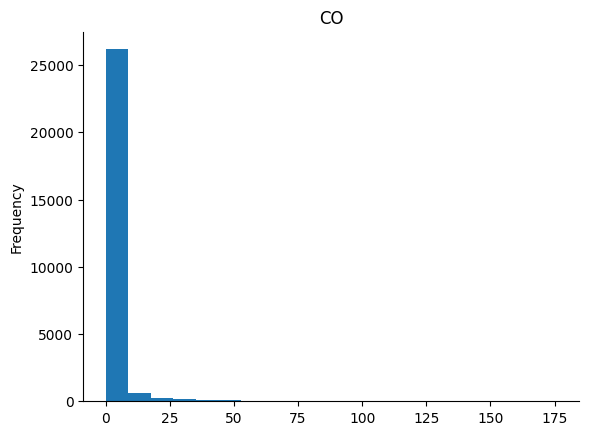

In [ ]:
from matplotlib import pyplot as plt
df['CO'].plot(kind='hist', bins=20, title='CO')
plt.gca().spines[['top', 'right',]].set_visible(False)

this code extracts columns containing numerical data with data type float64 from cleaned_data and stores them in a new DataFrame

In [ ]:
gasses = cleaned_data.select_dtypes(include = np.float64)
gasses

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Benzene  \
2123   81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     0.20   
2124   78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     0.22   
2125   88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     0.29   
2126   64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     0.17   
2127   72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74     0.21   
...      ...     ...   ...    ...    ...    ...   ...    ...     ...      ...   
29525   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87   19.90     1.45   
29526  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55   23.30     2.24   
29527  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72   30.14     0.74   
29528  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42   30.96     0.01   
29529  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84   28.30     0.00   

       Toluene  Xylene    AQI  
2123      6.50    0.06  184.0  
2124      7.95    0.08  197.0  
2125      7.63    0.12  198.0  
2126      5.02    0.07  188.0  
2127      4.71    0.08  173.0  
...        ...     ...    ...  
29525     5.37    1.45   47.0  
29526    12.07    0.73   41.0  
29527     2.21    0.38   70.0  
29528     0.01    0.00   68.0  
29529     0.00    0.00   54.0  

[6236 rows x 13 columns]

It contains the correlation coefficients between each column in the DataFrame and the "AQI" column, providing insights into the relationship between different gas levels and the Air Quality Index (AQI).

In [ ]:
corr = gasses.corr().AQI
corr

PM2.5      0.924028
PM10       0.916576
NO         0.622031
NO2        0.576308
NOx        0.658264
NH3        0.589695
CO         0.494508
SO2        0.254686
O3         0.334609
Benzene    0.207927
Toluene    0.466346
Xylene     0.073873
AQI        1.000000
Name: AQI, dtype: float64

In [ ]:
col_to_drop = corr[abs(corr) < 0.45].index

col_to_drop

Index(['SO2', 'O3', 'Benzene', 'Xylene'], dtype='object')

In [ ]:
gasses = gasses.drop(columns = col_to_drop)
gasses.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.895543  0.604239  0.559055  0.618705  0.582025  0.422486   
PM10     0.895543  1.000000  0.633340  0.625172  0.672993  0.585555  0.395632   
NO       0.604239  0.633340  1.000000  0.527426  0.875593  0.432795  0.292911   
NO2      0.559055  0.625172  0.527426  1.000000  0.692273  0.387388  0.231773   
NOx      0.618705  0.672993  0.875593  0.692273  1.000000  0.411122  0.336048   
NH3      0.582025  0.585555  0.432795  0.387388  0.411122  1.000000  0.449340   
CO       0.422486  0.395632  0.292911  0.231773  0.336048  0.449340  1.000000   
Toluene  0.475935  0.518722  0.541146  0.499104  0.596449  0.323563  0.200851   
AQI      0.924028  0.916576  0.622031  0.576308  0.658264  0.589695  0.494508   

          Toluene       AQI  
PM2.5    0.475935  0.924028  
PM10     0.518722  0.916576  
NO       0.541146  0.622031  
NO2      0.499104  0.576308  
NOx      0.596449  0.658264  
NH3      0.323563  0.589695  
CO       0.200851  0.494508  
Toluene  1.000000  0.466346  
AQI      0.466346  1.000000

In [ ]:
y = gasses.AQI
X = gasses.drop(columns = 'AQI')

this code efficiently splits the dataset into training and testing sets and then displays the shapes of these sets to verify the splitting process.







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("\nShapes of the sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of the sets:
X_train shape: (4988, 8)
X_test shape: (1248, 8)
y_train shape: (4988,)
y_test shape: (1248,)


this code normalizes the target variable y by dividing each value by its maximum value, and then it prints the maximum value of y before normalization.

In [ ]:
y_max = y.max()
y = y/y.max()

print(y_max)

677.0


These operations provide insights into the range of values that the normalized target variable y now spans, which is essential for understanding the scale and distribution of the data post-normalization.

In [ ]:
y.min() , y.max()

(0.033973412112259974, 1.0)

X_max contains the maximum value for each feature in the dataset, providing insights into the range of values that each feature spans. Printing X_max allows you to observe the maximum values for each feature, which can be useful for understanding the scale and distribution of the features in the dataset.

In [ ]:
X_max = X.max()
print(X_max)

PM2.5      639.19
PM10       796.88
NO         159.22
NO2        140.17
NOx        224.09
NH3        166.70
CO          16.23
Toluene    103.00
dtype: float64


these operations normalize the feature matrix X to ensure that each feature's values fall within a similar range, which can improve the performance of machine learning algorithms. The minimum and maximum values after normalization provide insights into the scale and distribution of the features in the dataset.







In [ ]:
X = X/X_max
X.min() , X.max()

(PM2.5      0.003129
 PM10       0.009788
 NO         0.001570
 NO2        0.001213
 NOx        0.000759
 NH3        0.000720
 CO         0.000000
 Toluene    0.000000
 dtype: float64,
 PM2.5      1.0
 PM10       1.0
 NO         1.0
 NO2        1.0
 NOx        1.0
 NH3        1.0
 CO         1.0
 Toluene    1.0
 dtype: float64)

 this code segment splits the dataset, trains a linear regression model on the training data, makes predictions on the test data, evaluates the model's performance using mean squared error and R-squared, and prints out the evaluation results.







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model's performance
print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)




Linear Regression Model Evaluation:
Mean Squared Error: 0.0014963481061406403
R-squared: 0.9175718290039866


 this code segment creates, trains, and evaluates a decision tree regression model, providing insights into its performance in predicting the target variable.

In [ ]:
# Create and fit the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Making predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluating the model
mse_tree = mean_squared_error(y_test, y_pred_tree)


r2 = r2_score(y_test, y_pred_tree)


print("\nDecision Tree Model Evaluation:")
print("Mean Squared Error :", mse_tree)
print("R-squared:", r2)

# Calculate and display the accuracy of the prediction
accuracy = r2_score(y_test, y_pred) * 100
print('Accuracy of the prediction:', accuracy, '%')



Decision Tree Model Evaluation:
Mean Squared Error : 0.001958279004148347
R-squared: 0.8921257988368976
Accuracy of the prediction: 91.75718290039866 %


 this code segment preprocesses the data, builds and trains a neural network model, and evaluates its performance for multiclass classification of air quality index buckets.







In [ ]:
# Create a LabelEncoder
le = LabelEncoder()
# List of columns to encode
columns_to_encode = ['City', 'AQI_Bucket']
# Encode the specified columns
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

# Split your dataset into features (X) and the target variable (y)
X = df.drop(columns=['AQI_Bucket', 'AQI', 'City'])  # Features
y = df['AQI_Bucket']  # Target variable

# Impute missing values in X with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split the log-transformed data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but can help with training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Define a basic neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization after the first Dense layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization after the second Dense layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')


Epoch 1/20
739/739 [==============================] - 4s 3ms/step - loss: 1.0760 - accuracy: 0.6092
Epoch 2/20
739/739 [==============================] - 2s 2ms/step - loss: 0.8218 - accuracy: 0.6894
Epoch 3/20
739/739 [==============================] - 2s 2ms/step - loss: 0.7720 - accuracy: 0.7099
Epoch 4/20
739/739 [==============================] - 2s 2ms/step - loss: 0.7406 - accuracy: 0.7179
Epoch 5/20
739/739 [==============================] - 2s 2ms/step - loss: 0.7290 - accuracy: 0.7231
Epoch 6/20
739/739 [==============================] - 1s 2ms/step - loss: 0.7180 - accuracy: 0.7269
Epoch 7/20
739/739 [==============================] - 2s 3ms/step - loss: 0.7024 - accuracy: 0.7322
Epoch 8/20
739/739 [==============================] - 3s 3ms/step - loss: 0.6945 - accuracy: 0.7381
Epoch 9/20
739/739 [==============================] - 2s 3ms/step - loss: 0.6850 - accuracy: 0.7426
Epoch 10/20
739/739 [==============================] - 2s 2ms/step - loss: 0.6768 - accuracy: 0.7423

this code demonstrates the process of building, training, and evaluating a neural network model for regression tasks using TensorFlow and Keras.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch_size as needed

# Make predictions on the test data
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model's performance
print("\nNeural Network Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calculate and display the accuracy of the prediction
accuracy = r2_score(y_test, y_pred) * 100
print('Accuracy of the prediction:', accuracy, '%')


185/185 [==============================] - 0s 1ms/step

Neural Network Model Evaluation:
Mean Squared Error: 1.2525564776874485
R-squared: 0.6392434589042134
Accuracy of the prediction: 63.92434589042134 %
